Bibliotecas importadas

In [179]:
import glob
import matplotlib.pyplot as plt
import cv2
import os
import shutil
import numpy as np

Organizamos los datasets de las vacas, ciervos y caballos

In [180]:
c_dataset = glob.glob('datasets/Cow/*')
d_dataset = glob.glob('datasets/Deer/*')
h_dataset = glob.glob('datasets/Horse/*')

cow_dataset = []
deer_dataset = []
horse_dataset = []

for i in range(0, len(c_dataset), 4):
    sublist_c = c_dataset[i:i + 4]  # Toma 4 archivos
    cow_dataset.append(sublist_c)     # Agrega la sublista a la lista principal

for i in range(0, len(d_dataset), 4):
    sublist_d = d_dataset[i:i + 4] 
    deer_dataset.append(sublist_d) 

for i in range(0, len(h_dataset), 4):
    sublist_h = h_dataset[i:i + 4] 
    horse_dataset.append(sublist_h) 

tot_images = len(cow_dataset) + len(deer_dataset) + len(horse_dataset)

In [181]:
print(f'Cantidad de imágenes RGB-T junto con las coordenadas de las vacas: {len(cow_dataset)}')
print(f'Cantidad de imágenes RGB-T junto con las coordenadas de las ciervos: {len(deer_dataset)}')
print(f'Cantidad de imágenes RGB-T junto con las coordenadas de las caballos: {len(horse_dataset)}')
print(f'Cantidad total de imágenes: {tot_images}')

Cantidad de imágenes RGB-T junto con las coordenadas de las vacas: 68
Cantidad de imágenes RGB-T junto con las coordenadas de las ciervos: 53
Cantidad de imágenes RGB-T junto con las coordenadas de las caballos: 43
Cantidad total de imágenes: 164


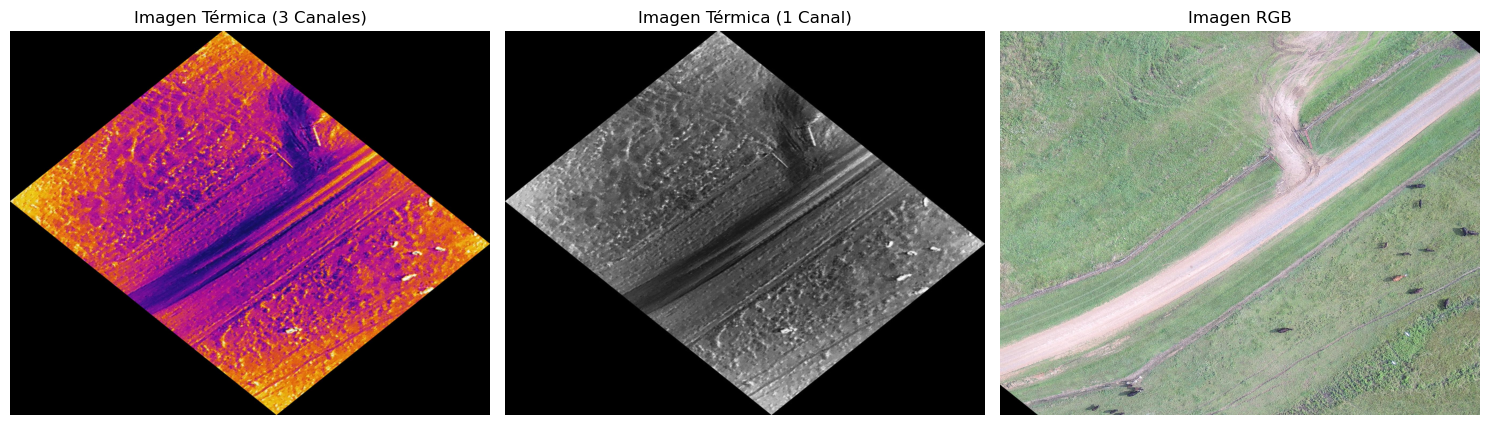

Coordenadas de las vacas para ambas imágenes:

0 0.589245 0.778475 0.041104 0.024627
0 0.829172 0.642324 0.039659 0.027533
0 0.800434 0.556593 0.018822 0.023521
0 0.847973 0.578607 0.025097 0.015681
0 0.896477 0.570163 0.024614 0.019300
0 0.876448 0.446826 0.014479 0.029553


In [182]:
img_t = cv2.imread(cow_dataset[0][0])
img_t = cv2.cvtColor(img_t, cv2.COLOR_BGR2RGB)  # Convierte de BGR a RGB

img_rgb = cv2.imread(cow_dataset[0][2])
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)  # Convierte de BGR a RGB

img_t_oneCh = cv2.imread(cow_dataset[0][0])
img_t_oneCh = cv2.cvtColor(img_t_oneCh, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 5))

# Imagen Térmica en 3 Canales
plt.subplot(1, 3, 1)  
plt.imshow(img_t)
plt.title('Imagen Térmica (3 Canales)')
plt.axis('off')

# Imagen RGB
plt.subplot(1, 3, 3)  
plt.imshow(img_rgb)
plt.title('Imagen RGB')
plt.axis('off')

# Imagen Térmica en 1 Canal (Escala de Grises)
plt.subplot(1, 3, 2)  
plt.imshow(img_t_oneCh, cmap='gray')
plt.title('Imagen Térmica (1 Canal)')
plt.axis('off')

plt.tight_layout()  
plt.show()

print("Coordenadas de las vacas para ambas imágenes:\n")

coord_file_path = cow_dataset[0][1]  

with open(coord_file_path, 'r') as file:
    coordenadas = file.readlines()  # Lee todas las líneas del archivo

for linea in coordenadas:
    print(linea.strip())  # Imprime cada línea, eliminando saltos de línea


Interpretación de las coordenadas:

Clase (ID del objeto): Representa la clase del objeto. 0 es vaca, 1 es ciervo y 2 es caballo.

X Centro (center_x): El segundo valor es la coordenada X del centro del objeto relativa al ancho de la imagen. Se da como un valor entre 0 y 1, donde 0 es el borde izquierdo y 1 es el borde derecho.

Y Centro (center_y): El tercer valor es la coordenada Y del centro del objeto relativa a la altura de la imagen. Se da como un valor entre 0 y 1, donde 0 es la parte superior y 1 es la parte inferior.

Ancho (width): El cuarto valor es el ancho del objeto, también en relación al ancho de la imagen, expresado como un valor entre 0 y 1.

Altura (height): El quinto valor es la altura del objeto, también en relación a la altura de la imagen, expresado como un valor entre 0 y 1.

Ejemplo de interpretación con la primera línea: 

0: Clase del objeto (puede representar una vaca).

0.589245: El centro del objeto está al 58.92% del ancho de la imagen.

0.778475: El centro del objeto está al 77.85% de la altura de la imagen.

0.041104: El ancho del objeto es el 4.11% del ancho de la imagen.

0.024627: La altura del objeto es el 2.46% de la altura de la imagen.

Ahora vamos a guardar en distintas carpetas las imagenes RGB y las T junto con las coordenadas

In [183]:
cow_rgb_data = []
cow_t_data = []

for i in range(0, len(cow_dataset)):
    cow_rgb_data.append(cow_dataset[i][2])
    cow_rgb_data.append(cow_dataset[i][3])

for i in range(0, len(cow_dataset)):
    cow_t_data.append(cow_dataset[i][0])
    cow_t_data.append(cow_dataset[i][1])

deer_rgb_data = []
deer_t_data = []

for i in range(0, len(deer_dataset)):
    deer_rgb_data.append(deer_dataset[i][2])
    deer_rgb_data.append(deer_dataset[i][3])

for i in range(0, len(deer_dataset)):
    deer_t_data.append(deer_dataset[i][0])
    deer_t_data.append(deer_dataset[i][1])

horse_rgb_data = []
horse_t_data = []

for i in range(0, len(horse_dataset)):
    horse_rgb_data.append(horse_dataset[i][2])
    horse_rgb_data.append(horse_dataset[i][3])

for i in range(0, len(horse_dataset)):
    horse_t_data.append(horse_dataset[i][0])
    horse_t_data.append(horse_dataset[i][1])

deer_rgb_data = [file.replace('\\', '/') for file in deer_rgb_data]
deer_t_data = [file.replace('\\', '/') for file in deer_t_data]

horse_rgb_data = [file.replace('\\', '/') for file in horse_rgb_data]
horse_t_data = [file.replace('\\', '/') for file in horse_t_data]

In [184]:
# Rutas de destino
dataset_RGB = "dataset_RGB"  
dataset_T = "dataset_T"     

# Función para copiar archivos
def copy_files(file_list, destination_folder):

    for file_name in file_list:

        # Rutas de los archivos originales
        source_path = file_name
        
        # Define la ruta de destino
        destination_path = os.path.join(destination_folder, os.path.basename(file_name))
        
        # Copiar archivo
        try:
            shutil.copy(source_path, destination_path)
            print(f'Copiado: {file_name} a {destination_folder}')
        except FileNotFoundError:
            print(f'No se encontró el archivo: {source_path}')
        except Exception as e:
            print(f'Ocurrió un error al copiar {file_name}: {e}')

# Copiar imágenes de vacas
#copy_files(cow_rgb_data, os.path.join(dataset_RGB, 'Cow'))
#copy_files(cow_t_data, os.path.join(dataset_T, 'Cow'))

# Copiar imágenes de ciervos
#copy_files(deer_rgb_data, os.path.join(dataset_RGB, 'Deer'))
#copy_files(deer_t_data, os.path.join(dataset_T, 'Deer'))

# Copiar imágenes de caballos
#copy_files(horse_rgb_data, os.path.join(dataset_RGB, 'Horse'))
#copy_files(horse_t_data, os.path.join(dataset_T, 'Horse'))

Creamos datasets HST y GST y los guardamos en nuevas carpetas

In [185]:
def create_hst_image(rgb_path, thermal_path):

    rgb_image = cv2.imread(rgb_path)
    thermal_image = cv2.imread(thermal_path)

    # Convert RGB to HSV
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)

    # Extract H and S channels
    h_channel, s_channel, _ = cv2.split(hsv_image)

    # Convert to grayscale (one channel)
    thermal_image = cv2.cvtColor(thermal_image, cv2.COLOR_BGR2GRAY)  

    # Merge H, S, and Thermal (T) into HST
    hst_image = cv2.merge([h_channel, s_channel, thermal_image])

    return hst_image

def create_gst_image(rgb_path, thermal_path):

    rgb_image = cv2.imread(rgb_path)
    thermal_image = cv2.imread(thermal_path)

    # Convert RGB to grayscale for G channel
    g_channel = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

    # Convert RGB to HSV and extract S channel
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2HSV)
    _, s_channel, _ = cv2.split(hsv_image)

    # Convert to grayscale (one channel)
    thermal_image = cv2.cvtColor(thermal_image, cv2.COLOR_BGR2GRAY)  

    # Merge G, S, and Thermal (T) into GST
    gst_image = cv2.merge([g_channel, s_channel, thermal_image])

    return gst_image

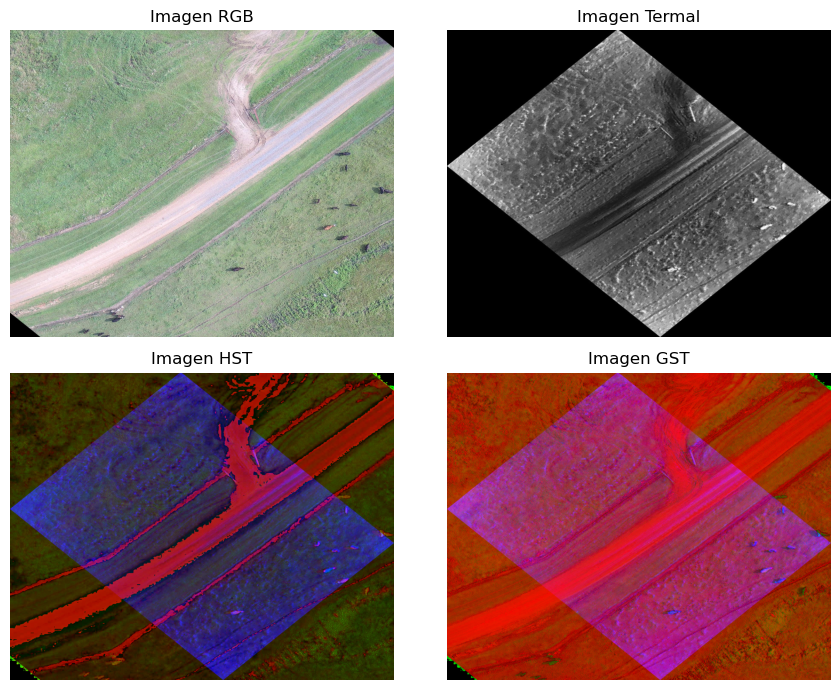

In [186]:
hst_cow = create_hst_image(cow_rgb_data[0], cow_t_data[0])
gst_cow = create_gst_image(cow_rgb_data[0], cow_t_data[0])

plt.figure(figsize=(9, 7))

# Imagen RGB
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Imagen RGB')
plt.axis('off') 

# Imagen T
plt.subplot(2, 2, 2)
plt.imshow(img_t_oneCh, cmap='gray')
plt.title('Imagen Termal')
plt.axis('off') 

# Imagen HST
plt.subplot(2, 2, 3)
plt.imshow(hst_cow)
plt.title('Imagen HST')
plt.axis('off') 
    
# Imagen GST
plt.subplot(2, 2, 4)
plt.imshow(gst_cow)
plt.title('Imagen GST')
plt.axis('off')  

plt.tight_layout()
plt.show()

In [187]:
def process_datasets(rgb_data, thermal_data, output_folder_hst, output_folder_gst):
    for rgb_path, thermal_path in zip(rgb_data, thermal_data):

        # Save images to respective directories
        hst_output_path = os.path.join(output_folder_hst, os.path.basename(rgb_path))
        gst_output_path = os.path.join(output_folder_gst, os.path.basename(rgb_path))

        # Check if paths are valid image files
        if not rgb_path.endswith('.jpg') and not rgb_path.endswith('.JPG'):
            shutil.copy(rgb_path, hst_output_path)
            shutil.copy(rgb_path, gst_output_path)
            continue  # Skip if not valid image file

        # Create HST and GST images
        hst_image = create_hst_image(rgb_path, thermal_path)
        gst_image = create_gst_image(rgb_path, thermal_path)

        cv2.imwrite(hst_output_path, hst_image)
        cv2.imwrite(gst_output_path, gst_image)

# Destination routes
dataset_GST = "dataset_GST"
dataset_HST = "dataset_HST"

#process_datasets(cow_rgb_data, cow_t_data, os.path.join(dataset_HST, 'Cow'), os.path.join(dataset_GST, 'Cow'))
#process_datasets(deer_rgb_data, deer_t_data, os.path.join(dataset_HST, 'Deer'), os.path.join(dataset_GST, 'Deer'))
#process_datasets(horse_rgb_data, horse_t_data, os.path.join(dataset_HST, 'Horse'), os.path.join(dataset_GST, 'Horse'))

Imágenes RGB y T fusionadas en 4 canales

In [188]:
def rgb_t_fusion_4_ch(rgb_path, thermal_path):
    
    rgb_image = cv2.imread(rgb_path)
    # Cargar la imagen térmica (en 3 canales)
    thermal_image = cv2.imread(thermal_path)

    # Convertir la térmica a escala de grises y agregar un canal
    thermal_image_bw = cv2.cvtColor(thermal_image, cv2.COLOR_BGR2GRAY)
    thermal_image_bw = thermal_image_bw[..., np.newaxis]  # Agregar un nuevo eje para que tenga 1 canal

    # Concatenar todas las imágenes en un solo arreglo de 4 canales
    fusion_image = np.concatenate([rgb_image, thermal_image_bw], axis=-1)

    return fusion_image / 255.0  # Normalización

(1434, 1792, 4)


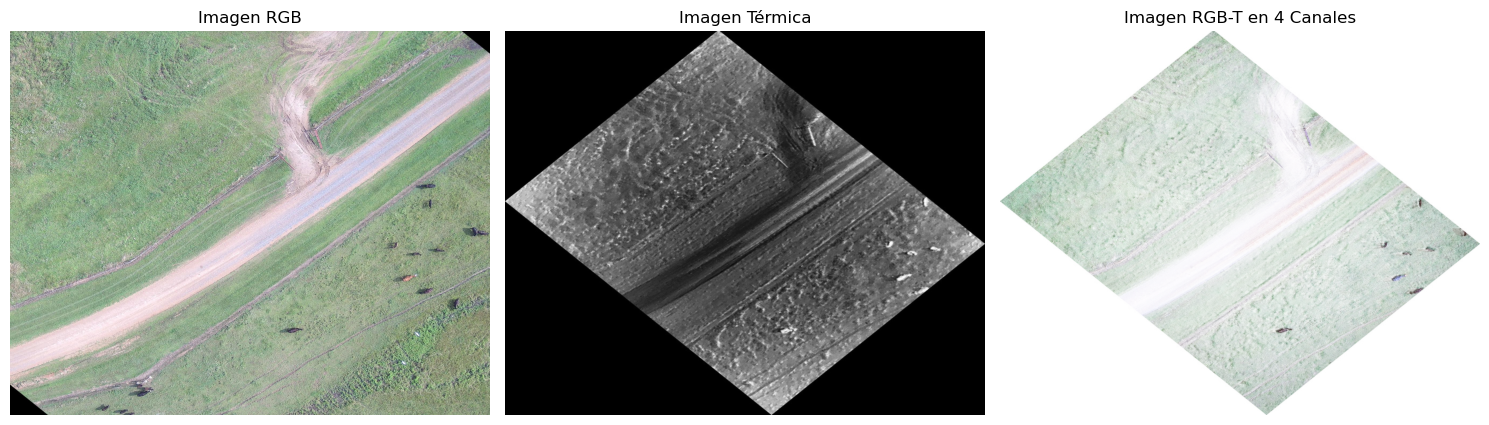

In [189]:
fusion_cow_4_ch = rgb_t_fusion_4_ch(cow_rgb_data[0], cow_t_data[0])
print(fusion_cow_4_ch.shape)

# Define el tamaño de la figura
plt.figure(figsize=(15, 5))  # Ajusta el tamaño de la figura como prefieras

# Imagen RGB
plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, 1ra imagen
plt.imshow(img_rgb)
plt.title('Imagen RGB')
plt.axis('off') 

# Imagen Térmica
plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, 2da imagen
plt.imshow(img_t_oneCh, cmap='gray')
plt.title('Imagen Térmica')
plt.axis('off') 

# Imagen RGB-T en 4 canales
plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, 3ra imagen
plt.imshow(fusion_cow_4_ch)
plt.title('Imagen RGB-T en 4 Canales')
plt.axis('off') 

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()

Guardamos las imágenes fusionadas en la carpeta "dataset_RGB_T"

In [191]:
def process_dataset_RGB_T(directory_RGB, directory_T, output_folder):
    # Crear el directorio de salida si no existe
    os.makedirs(output_folder, exist_ok=True)

    # Procesar imágenes en las subcarpetas
    for animal in ['Cow', 'Deer', 'Horse']:
        rgb_folder = os.path.join(directory_RGB, animal)
        thermal_folder = os.path.join(directory_T, animal)

        # Obtener las rutas de las imágenes
        rgb_image_paths = glob.glob(os.path.join(rgb_folder, '*.jpg')) + glob.glob(os.path.join(rgb_folder, '*.JPG'))
        thermal_image_paths = glob.glob(os.path.join(thermal_folder, '*.jpg')) + glob.glob(os.path.join(thermal_folder, '*.JPG'))

        for rgb_path, thermal_path in zip(rgb_image_paths, thermal_image_paths):

            # Crear imágenes fusionadas RGB-T en 4 canales
            rgb_t_image = rgb_t_fusion_4_ch(rgb_path, thermal_path)

            # Generar un nombre de archivo de salida, cambiando la extensión a .tiff
            output_path = os.path.join(output_folder, os.path.basename(rgb_path)).replace('.jpg', '.tiff').replace('.JPG', '.tiff')

            # Guardar la imagen en formato TIFF
            cv2.imwrite(output_path, (rgb_t_image * 255).astype(np.uint8))  # Convertir de nuevo a rango [0, 255]

# Usar la función
directory_RGB = 'dataset_RGB/'
directory_T = 'dataset_T/'
output_folder = 'dataset_RGB_T/'

process_dataset_RGB_T(directory_RGB, directory_T, output_folder)